# Decomposition model exercise



In [ ]:
# Install pvlib on Google Colab as this is not a standard package.
!pip install pvlib

In [2]:
import pvlib  # library for PV and solar calculations
import pandas as pd  # library for data analysis
import matplotlib.pyplot as plt  # library for plotting
import numpy as np  # library for math and linear algebra

## Step 1: Decomposition models

First, browse through the decomposition models available in pvlib [here](https://pvlib-python.readthedocs.io/en/stable/reference/irradiance/decomposition.html).

## Step 2: Retrieve example dataset
The next step is to retrieve the example dataset, which we will use for this exercise.

For the example, we will retrieve data for 2024 from the Cabauw (CAB) BSRN station in the Netherlands.

In [40]:
data, meta = pvlib.iotools.get_bsrn(
    station='CAB',
    start='2024-01-01',
    end='2024-12-31',
    username='bsrnftp',
    password='bsrn1',
)

data.head()

,ghi,ghi_std,ghi_min,ghi_max,dni,dni_std,dni_min,dni_max,dhi,dhi_std,dhi_min,dhi_max,lwd,lwd_std,lwd_min,lwd_max,temp_air,relative_humidity,pressure
2024-01-01 00:00:00+00:00,-1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.1,-1.0,-1.0,329.0,0.3,329.0,330.0,7.8,81.0,996.0
2024-01-01 00:01:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.1,-1.0,-1.0,330.0,0.1,329.0,330.0,7.7,81.4,996.0
2024-01-01 00:02:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.1,0.0,0.0,-1.0,0.0,-1.0,-1.0,329.0,0.3,329.0,330.0,7.6,82.4,996.0
2024-01-01 00:03:00+00:00,-1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,327.0,1.4,324.0,329.0,7.6,82.2,996.0
2024-01-01 00:04:00+00:00,-1.0,0.0,-1.0,-1.0,0.0,0.1,0.0,0.0,-1.0,0.0,-1.0,-1.0,323.0,0.6,322.0,324.0,7.7,81.8,996.0


## Step 3: Calculate solar position

In [41]:
location = pvlib.location.Location(
    latitude=meta['latitude'],
    longitude=meta['longitude'],
)

solpos = location.get_solarposition(data.index)

## Step 4: Estimate DHI using decomposition models

Estimate DHI and DNI using the [Erbs model](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.irradiance.erbs.html).

In [42]:
components = pvlib.irradiance.disc(
    ghi=data['ghi'],
    solar_zenith=solpos['apparent_zenith'],
    datetime_or_doy=data.index,
)

components.head()

,dni,kt,airmass
2024-01-01 00:00:00+00:00,0.0,0.0,NaN
2024-01-01 00:01:00+00:00,0.0,0.0,NaN
2024-01-01 00:02:00+00:00,0.0,0.0,NaN
2024-01-01 00:03:00+00:00,0.0,0.0,NaN
2024-01-01 00:04:00+00:00,0.0,0.0,NaN


## Step 5: Compare 

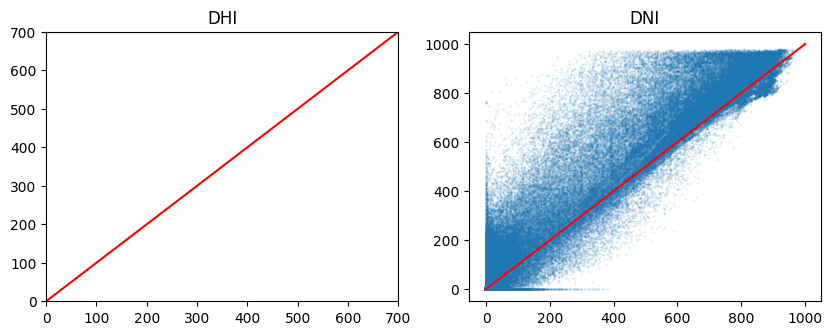

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3.5))

#axes[0].scatter(data['dhi'], components['dhi'], s=0.5, alpha=0.1)
axes[0].set_title('DHI')
axes[0].set_xlim(0, 700), axes[0].set_ylim(0, 700)

axes[1].scatter(data['dni'], components['dni'], s=0.5, alpha=0.1)
axes[1].set_title('DNI')

for ax in axes:
    ax.plot([0, 1000], [0, 1000], c='r')

plt.show()

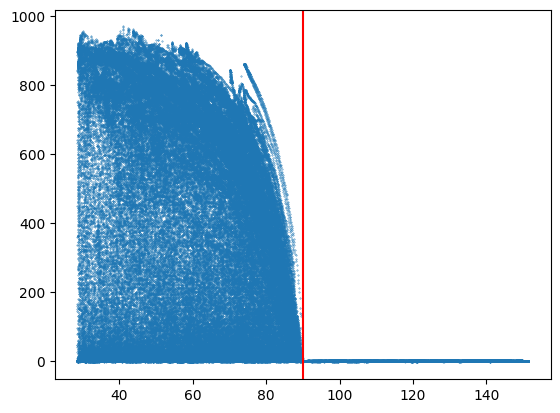

In [44]:
fig, ax = plt.subplots()

ax.scatter(solpos['apparent_zenith'], data['dni'], s=0.1)
ax.axvline(90, c='r')

## Step 6: Investigate which model is better

[Boland model](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.irradiance.boland.html)